# Introdução

### RMS Titanic

O `RMS Titanic` foi um navio de passageiros britânico operado pela `White Star Line` e construído pelos estaleiros da `Harland and Wolff` em `Belfast`. Foi a segunda embarcação da Classe Olympic de transatlânticos depois do RMS Olympic e seguido pelo HMHS Britannic.
A embarcação partiu em sua viagem inaugural de `Southampton` para `Nova Iorque` em `10 de abril de 1912`, no caminho passando em Cherbourg-Octeville na França e por Queenstown na Irlanda. Ele colidiu com um iceberg às `23h40min` do dia `14 de abril` e afundou na madrugada do dia seguinte com mais de `1500` pessoas a bordo, sendo um dos maiores desastres marítimos em tempos de paz de toda a história.

Este projeto tem como finalidade a conclusão do curso [Fundamentos de Data Science I](https://br.udacity.com/course/python-fundamentos-data-science--nd110) da [Udacity](https://br.udacity.com). Onde será utilizado o conchecimento obtido durante o curso, para realizar todos as passos do processo de analise de dados.

Com base nos dados disponibilizados no sítio [Kagle](https://www.kaggle.com/c/titanic/data), iremos explorar os dados contidos no arquivo `titanic-data-6.csv`, afim de responder as seguintes perguntas:
1. Quais fatores que contribuíram para a sobrevivência dos passageiros a bordo?
2. Qual a porcentagem de sobreviventes em cada classe do navio?
3. Qual a porcentagem de sobreviventes entre os que viajavam com e sem família?

# Limpeza dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import trunc

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_titanic = pd.read_csv('titanic-data-6.csv')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
def replace_null_value(df, column, value):
    ''' Substitui valores nulos em uma coluna
    input:
        df: DataFrame.
        column: Nome da coluna a ser alterada.
        value: Valor a ser aplicado.
    output:
        df: DataFrame alterado.
    '''
    return df[column].fillna(value, inplace=True)

Verificando a existência de valores nulos.

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Verificando se os tipos dos dados estao corretos.

In [5]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Verificando a existência de registros duplicados.

In [6]:
df_titanic.duplicated().sum()

0

Tratando os valores nulos.

In [7]:
age_means = df_titanic['Age'].mean()
replace_null_value(df_titanic, 'Age',  age_means)
replace_null_value(df_titanic, 'Cabin',  'Uninformed')
replace_null_value(df_titanic, 'Embarked',  'Uninformed')

Como foi detectado que os valores de `Age` se encontram no tipo `float` onde deveriam estar como `int`. Vamos tratar os tipos de dados.

In [8]:
df_titanic['Age'] = df_titanic['Age'].astype(int)

> *Para facilitar uma análise futura, vamos criar uma nova coluna que define se o passageiro possui ou não familiares abordo*.

Criando dois `DataFrames`, separando os passageiros que possuem e não possuem familiares abordo.

In [9]:
family_df = pd.DataFrame(data=df_titanic.query('SibSp > 0 or Parch > 0')) 
no_family_df = pd.DataFrame(data=df_titanic.query('SibSp == 0 and Parch == 0'))

Criando dois `vetores`, para **sim** e para **não**.

In [10]:
yes_df = np.repeat("yes", family_df.shape[0])
no_df = np.repeat("no", no_family_df.shape[0])

Criando uma nova coluna `family` nos novos `DataFrame` e carregado com seus respectivos `vetores`.

In [11]:
family_df['family'] = yes_df
no_family_df['family'] = no_df

Realizando a carga dos novos dados no `df_titanic`.

In [12]:
df_titanic = family_df.append(no_family_df)

Visualizando as alterações.

In [13]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Uninformed,S,yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,yes
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,Uninformed,S,yes
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,Uninformed,S,yes


In [14]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
family         891 non-null object
dtypes: float64(1), int64(6), object(6)
memory usage: 97.5+ KB


In [15]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age              int64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
family          object
dtype: object

# Código

In [16]:
def percente_cal(min_value, max_value):
    ''' Verifica a diferença em porcentagem de dois números.
    input:
        min_value: Menor valor.
        max_value: Maior valor.
    output:
        int: Porcentagem.
    '''
    return trunc((min_value/max_value) * 100)

In [17]:
def catplot_render(value1, value2, df, tag, title):
    '''
    input:
        value1: Campo do eixo X a ser considerado.
        value2: Campo do eixo Y a ser considerado.
        df: DataFrame.
        tag: Etiquetas.
        title: Título do gráfico.
    '''
    ax = sns.boxplot(x=value1, y=value2, hue=tag,
                     data=df, dodge=False).set_title(title)

Cria novos DataFrames: sobreviventes, homens sobreviventes e mulheres sobreviventes.

In [18]:
df_survived = df_titanic.query('Survived == "1"')
df_surv_fem = df_titanic.query('Sex == "female"')
df_surv_mal = df_titanic.query('Sex == "male"')

Visualiza o quantitativo de passageiros sobreviventes em várias categorias.

In [19]:
print('Sobreviventes: {}'.format(df_survived.shape[0]))
print('==========================')
print('Homens: {}'.format(df_surv_mal.shape[0]))
print('Com familiares abordo: {}'.format(df_surv_mal.query('family == "yes"').shape[0]))
print('Sem familiares abordo: {}'.format(df_surv_mal.query('family == "no"').shape[0]))
print('Primeira classe {}'.format(df_surv_mal.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_surv_mal.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_surv_mal.query('Pclass == 3').shape[0]))
print('==========================')
print('Mulheres: {}'.format(df_surv_fem.shape[0]))
print('Com familiares abordo: {}'.format(df_surv_fem.query('family == "yes"').shape[0]))
print('Sem familiares abordo: {}'.format(df_surv_fem.query('family == "no"').shape[0]))
print('Primeira classe {}'.format(df_surv_fem.query('Pclass == 1').shape[0]))
print('Segunda classe {}'.format(df_surv_fem.query('Pclass == 2').shape[0]))
print('Terceira classe {}'.format(df_surv_fem.query('Pclass == 3').shape[0]))

Sobreviventes: 342
Homens: 577
Com familiares abordo: 166
Sem familiares abordo: 411
Primeira classe 122
Segunda classe 108
Terceira classe 347
Mulheres: 314
Com familiares abordo: 188
Sem familiares abordo: 126
Primeira classe 94
Segunda classe 76
Terceira classe 144


Vizualizando a relação entre classe e o sexo dos passageiros sobreviventes.

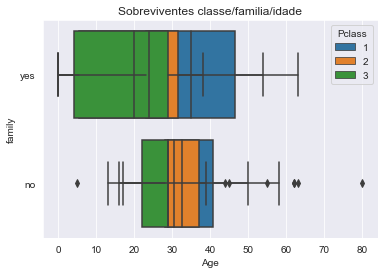

In [20]:
catplot_render("Age", "family", df_survived, "Pclass", "Sobreviventes classe/familia/idade")

> Podemos detectar que, mulheres com bilhete de primeira classe, tiveram maior exito em sobreviver.

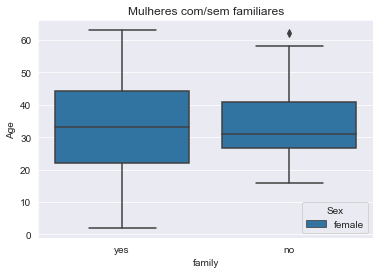

In [21]:
catplot_render("family", "Age", df_surv_fem.query('Pclass == 1'), "Sex", "Mulheres com/sem familiares")

> Podemos detectar que, mulheres subreviventes da primeira classe, obtiveram maior exito em sobreviver quando possuiam familiares abordo.

Porcentagem de tripulantes que sobreviveram.

In [22]:
print('{}% dos tripulantes que sobreviveram perteciam a primeira classe.'
      .format(percente_cal(df_survived.query('Pclass == 1').shape[0],df_survived.shape[0])))
print('{}% dos tripulantes que sobreviveram perteciam a segunda classe.'
      .format(percente_cal(df_survived.query('Pclass == 2').shape[0],df_survived.shape[0])))
print('{}% dos tripulantes que sobreviveram perteciam a terceira classe.'
      .format(percente_cal(df_survived.query('Pclass == 3').shape[0],df_survived.shape[0])))

39% dos tripulantes que sobreviveram perteciam a primeira classe.
25% dos tripulantes que sobreviveram perteciam a segunda classe.
34% dos tripulantes que sobreviveram perteciam a terceira classe.


Vizualização dos tripulantes vivos por classe de bilhete.

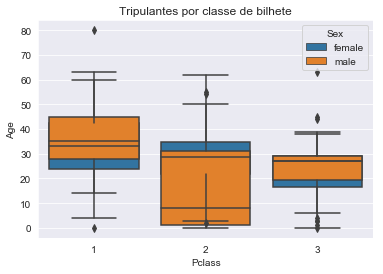

In [23]:
catplot_render("Pclass", "Age", df_survived, "Sex", "Tripulantes por classe de bilhete")

Porcentagem de sobreviventes Com/Sem familiares abordo.

In [24]:
print('{}% dos tripulantes que sobreviveram, possuiam familiares abordo.'
      .format(percente_cal(df_survived.query('family == "yes"').shape[0],df_survived.shape[0])))
print('{}% dos tripulantes que sobreviveram, possuiam familiares abordo.'
      .format(percente_cal(df_survived.query('family == "no"').shape[0],df_survived.shape[0])))

52% dos tripulantes que sobreviveram, possuiam familiares abordo.
47% dos tripulantes que sobreviveram, possuiam familiares abordo.


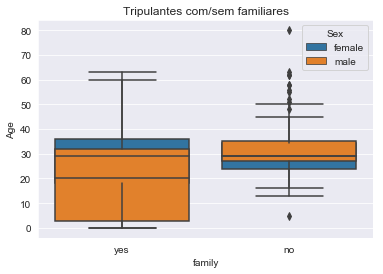

In [25]:
catplot_render("family", "Age", df_survived, "Sex", "Tripulantes com/sem familiares")

Podemos perceber que, a mioria dos tripulantes sobreviventes eram mulheres e possuiam familiares abordo.

# Conclusão

Analisando os dados do acidente Titanic, fica claro que:
1. Mulheres com bilhete de primeira classe, que possuiam familiares abordo foram previlegiadas no embarque aos botes salva vidas.
2. 39% dos sobreviventes pertenciam a 1ª classe, 25% pertenciam a 2ª classe e 34% pertenciam a 3ª classe.
3. 52% dos sobreviventes possuiam familiares abordo e 47% não possuiam.

# Limitações

1. Numa primeira visão encontrou-se como fator limitante para a análise, que algumas propriedades não possuiam valores para alguns dos passageiros. Estas caracteristicas são: `Age`, `Cabin` e `Embarked`.
    * Medidas tomadas:
        * Age: Os valores faltantes desta categoria, foram substituidos pela média de idade dos demais passageiros.
        * Cabin: Os valores faltantes desta categoria, foram subtituídos por `Uninformed`, devido não ter relevância na análise
        * Embarked: Os valores faltantes desta categoria, foram subtituídos por `Uninformed`, devido não ter relevância na análise
2. Encontrou-se como fator limitante que os valores de `Age` se encontravam no formato `float`.
    * Medida tomada:
        * Foi realizada uma conversão do tipo `float` para `int`.
3. Encontrou-se como fator limitante que exitem duas propriedades para determinar se o tripulante possui ou não familiares abordo.
    * Medida tomada:
        * Foi criada uma nova propriedade `family`, onde fica definido se tripulate possui ou não familiares abordo.